支持向量机 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seborn plotting defaults
import seaborn as sns; sns.set() 

支持向量机基本原理：低维不可分问题转换成高维可分问题

如果解决线性不可分问题呢？咱们给他映射到高维试试

z=x^2 + y^2

例子

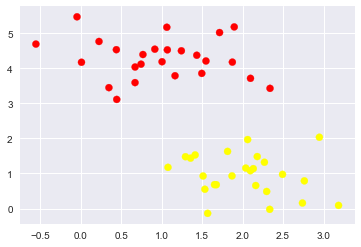

In [3]:
#随机来点数据
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

随便画几条线，那条好？

(-1, 3.5)

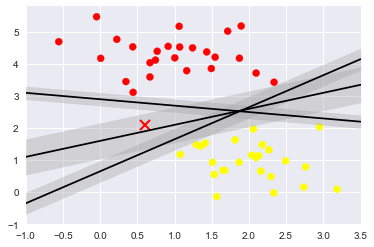

In [4]:
xfit = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plt.plot([0.6],[2.1],'x',color='red',markeredgewidth=2,markersize=10)

for m, b, d in [(1,0.65, 0.33),(0.5,1.6, 0.55),(-0.2,2.9, 0.2)]:
    yfit = m*xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',alpha=0.4)
    
plt.xlim(-1,3.5)

support_vector_machine:最小化 雷区  如上

训练一个基本的SVM

In [5]:
from sklearn.svm import SVC #support vector classifier
model = SVC(kernel = 'linear')   #线性支持向量机
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
#绘图函数
def plot_svc_decision_function(model, ax=None, plot_support=True):
    # plot the decision function for a 2D SVC
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to envluate model
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    #plot decision boundary and margins
    ax.contour(X,Y,P, colors='k',
              levels=[-1,0,1],alpha=0.5,
              linestyles=['--','-','--'])
    
    #plot support vector
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s=300,linewidth=1,facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

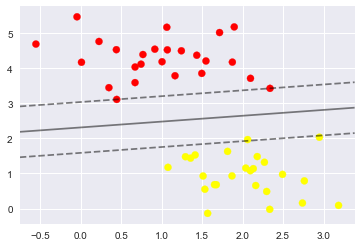

In [7]:
plt.scatter(X[:,0], X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(model)

这条线就是我我们希望的决策边界

观测发现3个点做了特殊的标记，它们恰好都是边界上的点。

它们就是我们的support vectors(支持向量)

在Scikit-Learn中，他们存在在这个位置 support_vectors_ (一个属性)
|

In [8]:
model.support_vectors_

array([[ 0.44359863,  3.11530945],
       [ 2.33812285,  3.43116792],
       [ 2.06156753,  1.96918596]])

观测可以发现，只需要支持向量，我们就可以把模型构建出来

接下来我们尝试一下，用不同多的数据点，看看效果会不会变化

分别使用60 120个数据点

......

观测发现：只要支持向量不变，其他数据怎么增加无所谓

引入核函数 SVM
    
        首先我们先用线性的核看一下在下面这种比较难的数据集上还能分吗

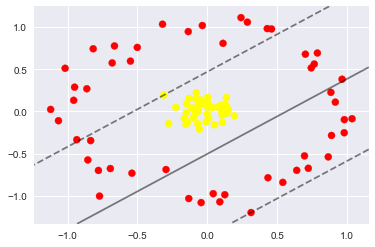

In [9]:
from sklearn.datasets.samples_generator import make_circles
X,y = make_circles(100, factor=.1 , noise=.1)

clf = SVC(kernel='linear').fit(X,y)

plt.scatter(X[:,0], X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)

线性的分不了了，试试高维核变换

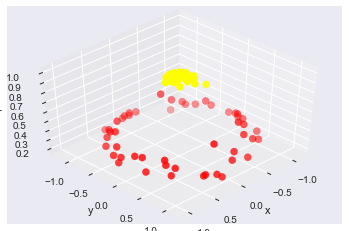

In [10]:
#加入了新的维度 r
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax=plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='autumn')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
plot_3D(elev=45,azim=45,X=X,y=y)

In [11]:
#加入径向基函数   径向基函数和高斯核函数和rbf -> 说的都是核变换
clf = SVC(kernel='rbf',C=1E6)
clf.fit(X,y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

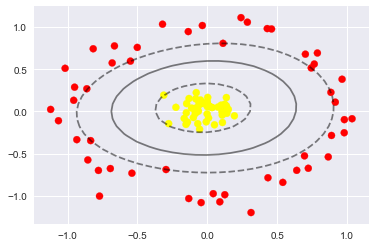

In [12]:
#这回牛逼了
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],
           s=300,lw=1,facecolor='none')

调节svm参数：soft margin问题

调节C参数

    当C趋于无穷大，意味着分类严格不能有错误
    
    当C趋于很小的时候，意味着可以有更大的容错能力

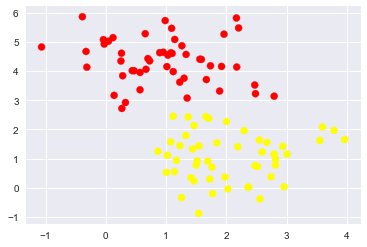

In [13]:
X, y = make_blobs(n_samples=100, centers=2,
                 random_state=0, cluster_std=0.8)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

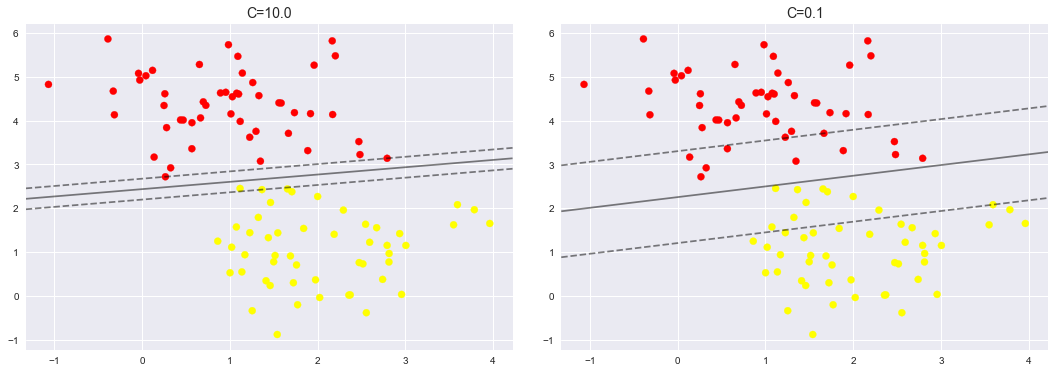

In [14]:
X, y = make_blobs(n_samples=100, centers=2,
                 random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0,0.1]):
    model = SVC(kernel='linear', C=C).fit(X,y)
    axi.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    plot_svc_decision_function(model,axi)
    axi.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300,linewidth=1,facecolors='none')
    axi.set_title("C={0:.1f}".format(C),size=14)

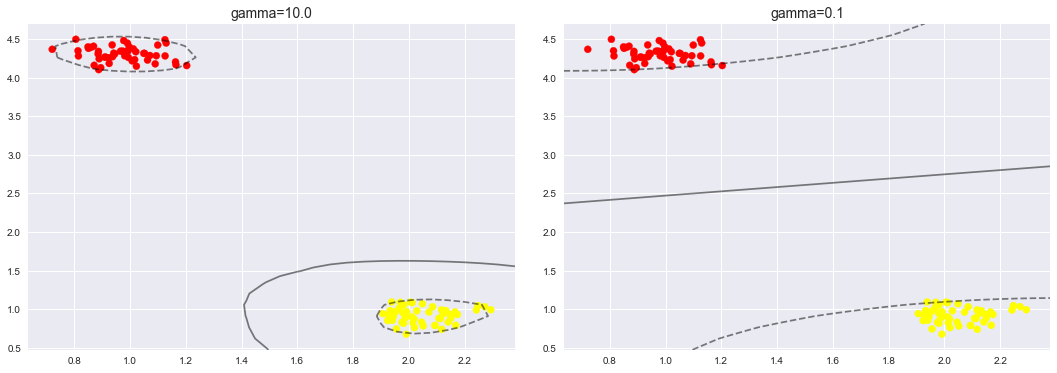

In [15]:
X, y = make_blobs(n_samples=100, centers=2,
                 random_state=0, cluster_std=0.1)
fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, gamma in zip(ax, [10.0,0.1]):
    model = SVC(kernel='rbf', gamma=gamma).fit(X,y)
    axi.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
    plot_svc_decision_function(model,axi)
    axi.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300,linewidth=1,facecolors='none')
    axi.set_title("gamma={0:.1f}".format(gamma),size=14)
#gamma越大，映射的维度越高，模型越复杂  相反越小，模型越精简，映射维度低
#我们不希望模型复杂，我们更喜欢泛化能力高的

Example:Face Recognition

In [23]:
from sklearn.datasets import fetch_lfw_people

#faces = fetch_lfw_people(min_faces_per_person=60)
#print(faces.target_names)
#print(faces.images.shape)



使用grid search cross-validation来选择我们的参数（C和gamma）

In [24]:
# from sklearn.model_selection import GridSearchCV
# para_grid={'svc_C':[1,5,10],
#            'svc_gamma':[0.0001,0.0005,0.01]}
# grid = GridSearchCV(model,para_grid)

# %time grid.fit(Xtrain,Ytarin)  #等待多久后可以得到结果，会打印出时间
